# Load Packages

In [1]:
push!(LOAD_PATH, pwd()) # put current directory on path
using Revise
using UnPack
#include("ModelHelperFuns.jl")  # load the file
#using .ModelHelperFuns         # bring the module into scope
using CooperativeHuntingPkg
using Plots
default(
    guidefontsize=14,   # controls xlabel, ylabel, title font size
    tickfontsize=12,    # controls axis number labels
    legendfontsize=14,  # controls legend font
    linewidth=2,        # controls default line thickness
    grid = false,        # turns off grid in background
    fontfamily="Computer Modern" # font family that matches latex
)
using BifurcationKit, DifferentialEquations
# pgfplotsx()  # Set PGFPlotsX as the backend # this seems to not work on my computer, or on vscode.
using Measures # helps for adjusting location of axis labels
bif_fig_path = "/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/"
using LaTeXStrings


# Basic Parameters

In [2]:
params_base = Dict(
    :α1_of_1 => 0.05,
    :α2_of_1 => 0.95,
    :s1 => 2.0,
    :s2 => 2.0,
    :H1a => 0.0,
    :H2a => 0.0,
    :H2b => 0.0,
    :A1 => 0.6,
    :A2 => 0.5,
    :η2 => 0.6,
    :β2 => 1.0,
    :α2_fun_type => "constant",
    :x_max => 10,
    :Tg => .01,
    :d => 100.0,
    :scale => 5.0
)
u0 = [0.1,0.1, fill(0.1,params_base[:x_max])...]


12-element Vector{Float64}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

# Generate all Figures

below is a summary of the conclusions from all the work done in the rest of the notebook. 

In [13]:
function make_and_save_nice_plots(br_list, fn_string_base)
    pltP = plot_nice_bif(br_list, :P, :scale)
    plot!(ylims=[-0.1,2.8])
    savefig(pltP, bif_fig_path*"p_"*fn_string_base*".pdf")

    pltN1 = plot_nice_bif(br_list, :N1, :scale)
    savefig(pltN1, bif_fig_path*"N1_"*fn_string_base*".pdf")

    pltN2 = plot_nice_bif(br_list, :N2, :scale)
    savefig(pltN2, bif_fig_path*"N2_"*fn_string_base*".pdf")
    pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
    plot!(ylims=[0.9,4.6])
    savefig(pltxbar, bif_fig_path*"meanx_"*fn_string_base*".pdf")

    pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
    savefig(pltNsum, bif_fig_path*"Nsum_"*fn_string_base*".pdf")

    return pltN1
end

make_and_save_nice_plots (generic function with 1 method)

┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 309
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 309.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67
┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 398
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 398.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67
┌ Warning: continue_sp failed for N1_extinct specialpoint 2: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documen

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 5.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 10, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 49
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 49.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67
┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 263
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 263.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67


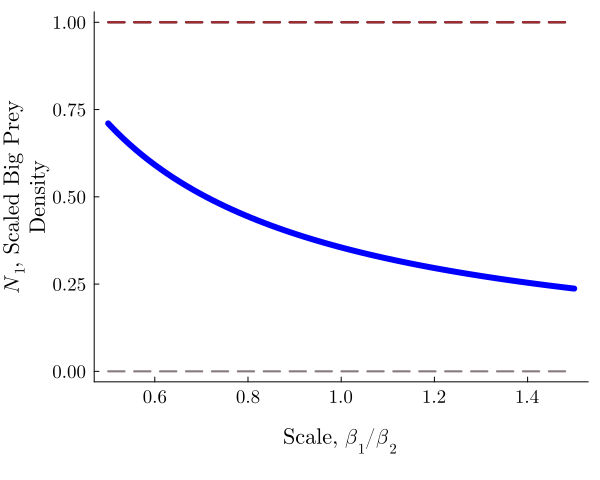

In [48]:
# type I, Scaled

    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = params[:H2b] = 0
    p_nt = NamedTuple(scale_parameters(params))
    br_list, extra_branches = diagram_2_recursion(
        p_nt; p_min = 1.01, p_max = 8.0, paramkey = :scale, 
        lens = (@optic _.scale), 
        systemfunction = fullsystem_scaled
        );
    plt_nt = make_and_save_nice_plots(br_list, "varyratio_type1")


# type II, vary scale
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    println(params)
    x_max = params[:x_max]
    u0 = fill(0.1, x_max+2)
    p_nt = NamedTuple(scale_parameters(params))
    br_list, extra_branches = diagram_2_recursion(
        p_nt; paramkey = :scale, p_min = 1.01, p_max = 8.0, lens = (@optic _.scale), 
        systemfunction = fullsystem_scaled); # this should give some warnings because some of the branches don't converge in the extrabranches
    plt_nt2 = make_and_save_nice_plots([br_list..., extra_branches[1:2]...], "varyratio_type2")

# type II, vary η2
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 4.0
    η2_upper = 6.0/7.0
    p_nt = NamedTuple(scale_parameters(params))
    vary_η2_params = (paramkey = :scale, lens = (@optic _.η2), p_min = 0.01, 
p_max = η2_upper);
    # extra branches found to be unnecessary (see work below)
    br_list = do_base_continuations(p_nt, p_nt.x_max; 
            lens = (@optic _.η2), p_min = 0.01, 
            p_max = η2_upper)

    plt_nt_η2 = make_and_save_nice_plots(br_list, "varyeta2_type2")

    
# type II, vary A1
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 6.0
    params[:A1]=0.6
    p_nt = NamedTuple(scale_parameters(params))
    br_list = do_base_continuations(p_nt, p_nt.x_max; lens = (@optic _.A1), 
        p_min = 0.5, p_max = 1.5)
    plt_nt_A1 = make_and_save_nice_plots(br_list, "varyA1_type2")

In [47]:
plt_nt_A1


UndefVarError: UndefVarError: `plt_nt_A1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [21]:


# type II, vary Tg
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 6.0
    params[:A1]=0.6
    params[:Tg] = 0.1
    params[:Tg_exp] = -3.0
    p_nt = NamedTuple(scale_parameters(params))
    
    br_list = do_base_continuations(p_nt, 5; lens = (@optic _.Tg_exp), 
        p_min = -4.0, p_max = 0.0, systemfunction = fullsystem_scaled_logTg)
        
    plt_meanx = plot_nice_bif_Tg(br_list, :mean_x)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

    pltN1 = plot_nice_bif_Tg(br_list, :N1)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


    pltN2 = plot_nice_bif_Tg(br_list, :N2)
    #plot!(xscale = :log)

    pltNsum = plot_nice_bif_Tg(br_list, :Nsum)
    #plot!(xscale = :log)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


    pltP = plot_nice_bif_Tg(br_list, :P)
    #plot!(xscale = :log)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

    savefig(plt_meanx, bif_fig_path*"meanx_varyTg_type2.pdf")
    savefig(pltN1, bif_fig_path*"N1_varyTg_type2.pdf")
    savefig(pltN2, bif_fig_path*"N2_varyTg_type2.pdf")
    savefig(pltNsum, bif_fig_path*"Nsum_varyTg_type2.pdf")
    savefig(pltP, bif_fig_path*"p_varyTg_type2.pdf")


    
    

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyTg_type2.pdf"

# Type I Fun Response, Scaled

In [4]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = params[:H2b] = 0
params[:x_max]=5
p_nt = NamedTuple(scale_parameters(params))
N1_0 =0.4
N2_0 = 0.45
g_out = get_g_equilibria(1.5, N1_0,N2_0, p_nt)
u0 = [N1_0, N2_0, g_out...]

7-element Vector{Float64}:
 0.4
 0.45
 5.6937379281050096e-5
 0.0004900949709303262
 0.4756456383567582
 0.01800586120347013
 5.025589404167059e-7

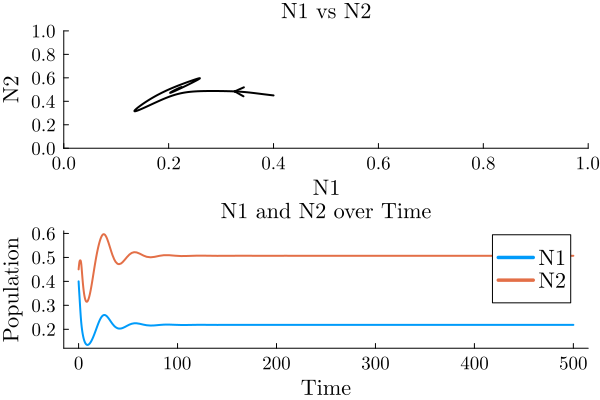

In [5]:

sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
display(plotN1N2)

In [6]:
br_list, extra_branches = diagram_2_recursion(p_nt; paramkey = :scale, 
        lens = (@optic _.scale), 
        p_min = 0.1, p_max = 8.0, 
        systemfunction =fullsystem_scaled, 
        dsmax = 0.01)

┌ Warning: continue_sp failed for N1_extinct specialpoint 3: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:684
┌ Warning: continue_sp failed for N1_extinct specialpoint 4: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:684


((coexist =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 615
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 0.8683148017292457, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +0.86671513,                                                                     step =  -1
- #  2,       bp at scale ≈ +1.46221503 ∈ (+1.46221503, +1.46221536), |δp|=3e-07, [converged], δ = (-1,  0), step = 147
- #  3,       bp at scale ≈ +1.55694099 ∈ (+1.55694099, +1.55694258), |δp|=2e-06, [converged], δ = (-1,  0), step = 155
- #  4, endpoint at scale ≈ +8.00000000,                                                                     step = 614
, predator_extinct =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 562
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 0.1, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +0.10000000,                                                                     step = 

hi

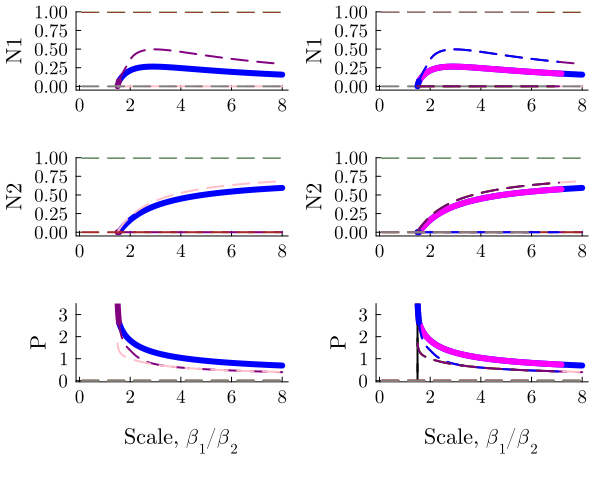

In [7]:
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], 
    :scale; ymax = 3.5)

hi

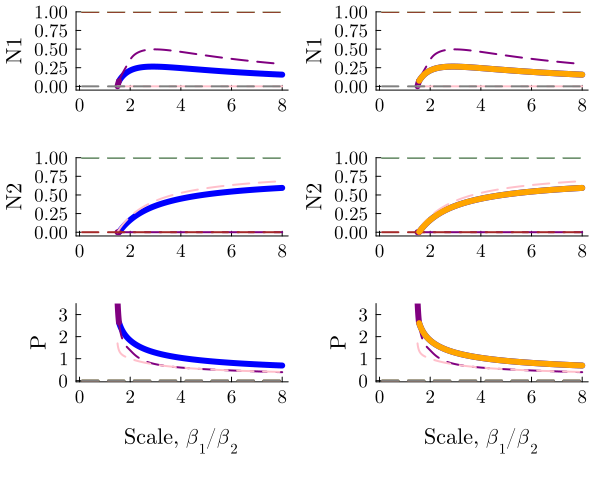

In [8]:
kargs = (
        lens = (@optic _.scale), 
        p_min = 0.1, p_max = 8.0, 
        systemfunction =fullsystem_scaled, 
        dsmax = 0.01
        )

u0 = fill(0.3, p_nt.x_max+2)
g_out = get_g_equilibria(1.5, 0.3, 0.3, p_nt)
u0[3:end] = g_out
u0 = iterate_to_last_pt_scaled(u0, p_nt; tf = 1000)
br_co_2 = do_continuation(u0, p_nt; kargs...)

plot_comparison_branches_filtered(
        [br_list...],[br_list...,br_co_2],
        :scale, ymax = 3.5)

So extra branches unnecessary

## Nice Plots

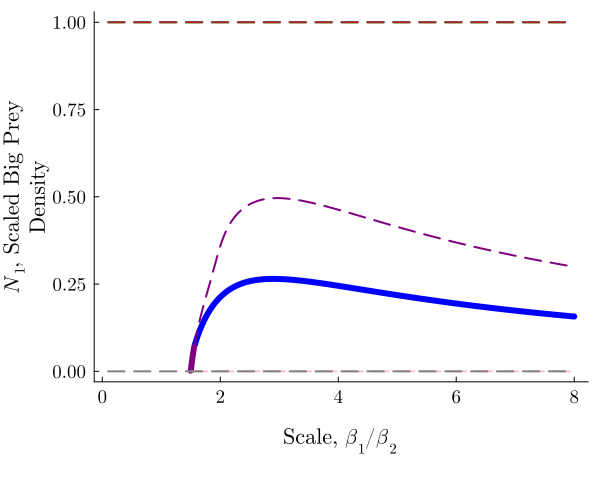

In [10]:
pltN1 = plot_nice_bif(br_list, :N1, :scale)


In [ ]:
pltP = plot_nice_bif(br_list, :P, :scale)
savefig(pltP, bif_fig_path*"p_varyratio_type1.pdf")
pltN1 = plot_nice_bif(br_list, :N1, :scale)
savefig(pltN1, bif_fig_path*"N1_varyratio_type1.pdf")
pltN2 = plot_nice_bif(br_list, :N2, :scale)
savefig(pltN2, bif_fig_path*"N2_varyratio_type1.pdf")
pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
plot!(pltxbar, legend=:right)
savefig(pltxbar, bif_fig_path*"meanx_varyratio_type1.pdf")
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
savefig(pltNsum, bif_fig_path*"Nsum_varyratio_type1.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type1.pdf"

# Type II, Vary Scale

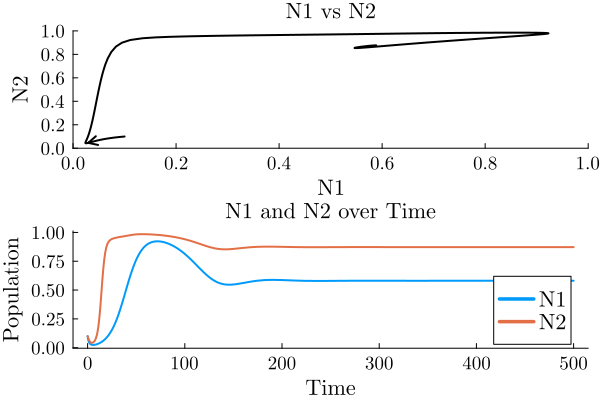

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 5.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 10, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


In [61]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
println(params)
x_max = params[:x_max]
u0 = fill(0.1, x_max+2)
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
display(plotN1N2)

┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 49
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 49.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67


hi

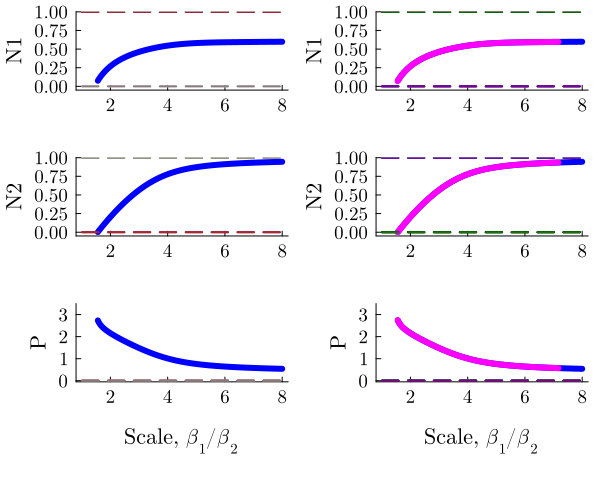

In [17]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, paramkey = :scale; p_min = 1.01, p_max = 8.0, 
    lens = (@optic _.scale), systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(br_list, [br_list...,extra_branches...], :scale; ymax = 3.5)

### A few simulations

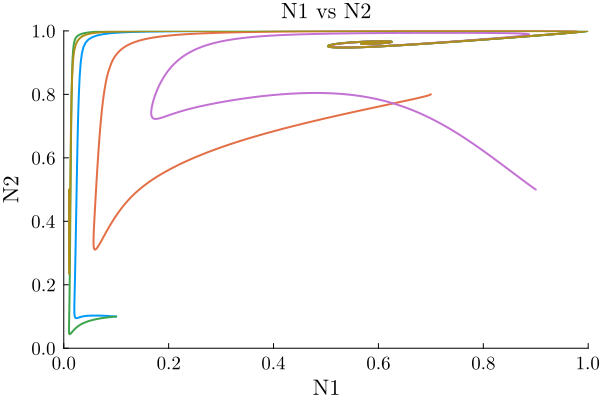

In [ ]:
tf = 1000
tspan = (0.0, tf)
params[:scale ]= 11
p_nt = NamedTuple(scale_parameters(params))
x_max = params[:x_max]
starting_points = [ fill(0.1, x_max + 2),
                    [0.7, 0.8, fill(0.1,x_max)...],
                    [0.1, 0.1, fill(0.2,x_max-2)..., 0.01, 0.01],
                    [0.9, 0.5, 0.01, 1.0, fill(0.01, x_max - 2)... ],
                    [0.01, 0.5, 0.01, 1.0, fill(0.01, x_max - 2)... ]]
plt = plot()
for u0 in starting_points
    prob = ODEProblem(fullsystem_scaled!, u0, tspan, p_nt)
    sol = solve(prob)

    # Extract N1 and N2 from the solution
    N1 = sol[1, :]  # First component of the solution
    N2 = sol[2, :]  # Second component of the solution
    plot!(N1, N2, xlabel="N1", ylabel="N2", title="N1 vs N2", legend=false, 
            xlims = (0,1), ylims = (0,1))
end
display(plt)

## Check Bifurcation Points

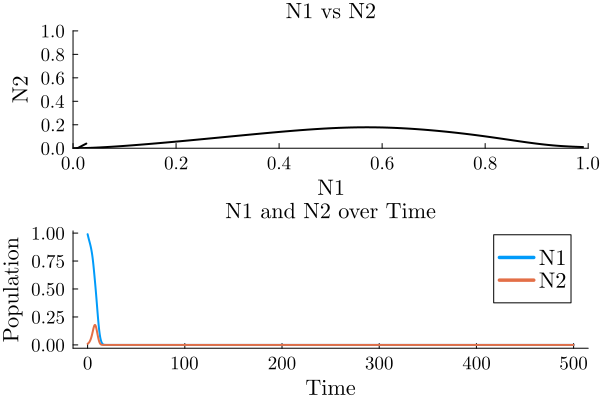

In [32]:
params[:scale] = 1.14
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot([.99, fill(.01,x_max+1)...], p_nt; tf = 500)
display(plotN1N2)

the hopf bifurcation point in the plot is not in a valid range

Checking bifurcation points to see if any of them can be branched from

I assume I'm getting this problem because of the hopf bifurcation being around 0

## Nice Plots 

In [76]:
pltN1 = plot_nice_bif(br_list, :N1, :scale)
savefig(pltN1, bif_fig_path*"N1_varyratio_type2.pdf")
pltN2 = plot_nice_bif(br_list, :N2, :scale)
savefig(pltN2, bif_fig_path*"N2_varyratio_type2.pdf")
pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
savefig(pltxbar, bif_fig_path*"meanx_varyratio_type2.pdf")
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
savefig(pltNsum, bif_fig_path*"Nsum_varyratio_type2.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type2.pdf"

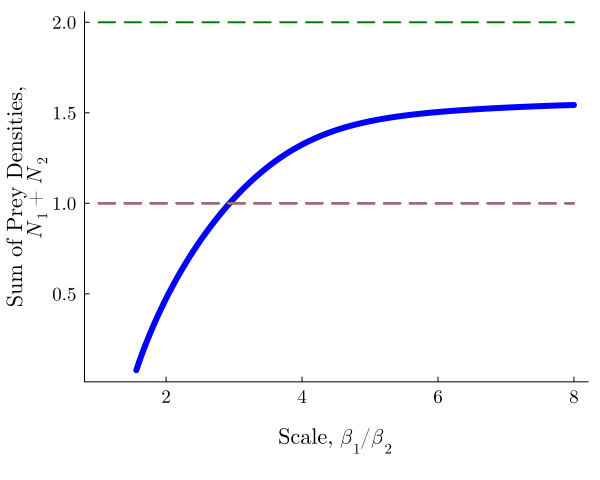

In [33]:
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)


# Type II, vary $\eta_2$

In [38]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 4.0
println(params)
η2_upper = 6.0/7.0
x_max = params[:x_max]
u0 = fill(0.1, x_max+2)
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
#display(plotN1N2)

vary_η2_params = (lens = (@optic _.η2), p_min = 0.01, 
p_max = η2_upper);

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 4.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 10, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 263
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 263.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67
┌ Warning: continue_sp failed for coexist specialpoint 3: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:684


hi

┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 327
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 327.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67
┌ Warning: continue_sp failed for coexist specialpoint 5: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:684
┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 76
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 76.
└ @ BifurcationKit /Users/t

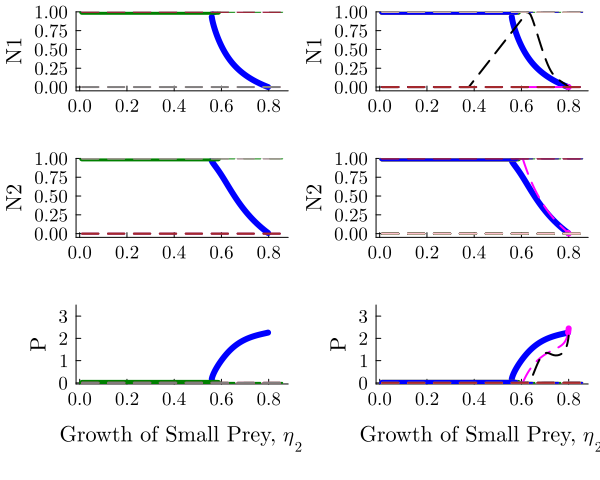

In [39]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, paramkey = :η2; vary_η2_params..., systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], :η2;
     ymax = 3.5, x_max = 5)

## Nice Plots

In [ ]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :η2)
savefig(plt_meanx, bif_fig_path*"meanx_varyeta2_type2.pdf")

pltN1 = plot_nice_bif(br_list, :N1, :η2)
savefig(pltN1, bif_fig_path*"N1_varyeta2_type2.pdf")

pltN2 = plot_nice_bif(br_list, :N2, :η2)
savefig(pltN2, bif_fig_path*"N2_varyeta2_type2.pdf")

pltNsum = plot_nice_bif(br_list, :Nsum, :η2)
savefig(pltNsum, bif_fig_path*"Nsum_varyeta2_type2.pdf")

pltP = plot_nice_bif(br_list, :P, :η2)
savefig(pltP, bif_fig_path*"p_varyeta2_type2.pdf")
#plot_nice_bif(br_list, :g3, :η2)

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyeta2_type2.pdf"

# Type II, Vary A1

In [42]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
p_nt = NamedTuple(scale_parameters(params))

(A1 = 0.6, η1 = 0.09999999999999999, H2b = 1.0, scale = 6.0, s1 = 2.0, H1a = 0.0, H2a = 0.0, x_max = 10, α2_of_1 = 0.95, η2 = 0.6, α2_fun_type = "constant", s2 = 2.0, α1_of_1 = 0.05, Tg = 0.01, d = 100.0, β1 = 6.0, H1b = 7.199999999999999, A2 = 0.5, β2 = 1.0)

hi

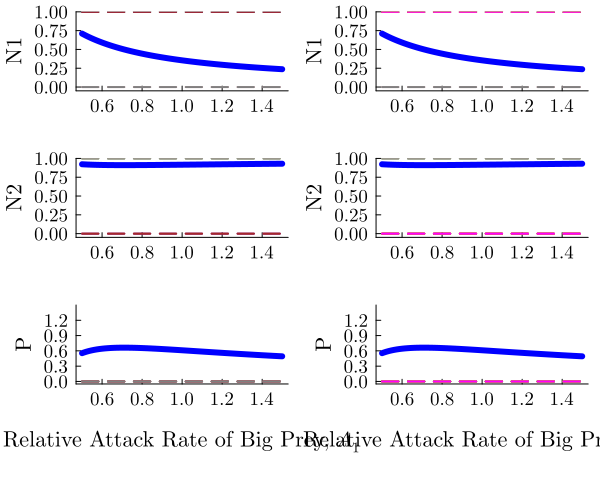

In [43]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, ; lens = (@optic _.A1), paramkey = :A1,
    p_min = 0.5, p_max = 1.5, 
    systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], :A1;
     ymax = 1.5, x_max = 5)

### Check from different coexistence starting point

In [44]:
u0 = fill(0.3, p_nt.x_max+2)
u0[3:end] = get_g_equilibria(1.5,0.3,0.3,p_nt)
u0 = iterate_to_last_pt_scaled(u0, p_nt; tf = 1000)
kargs
br_co2 = do_continuation(u0, p_nt; lens = (@optic _.A1),
    p_min = 0.5, p_max = 1.5, 
    systemfunction = fullsystem_scaled)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 75
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter A1 starts at 0.5, ends at 1.5
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at A1 ≈ +0.50000000,                                                                     step =   0
- #  2, endpoint at A1 ≈ +1.50000000,                                                                     step =  74


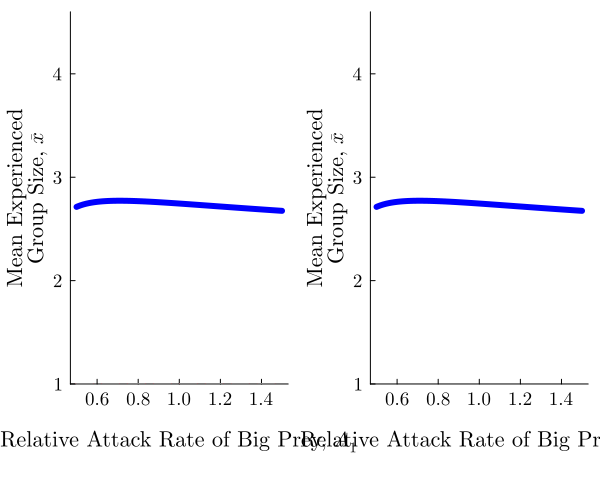

In [45]:
plt1 = plot_nice_bif(br_list, :mean_x, :A1)
plot!(ylims=[1,4.6])

plt2 = plot_nice_bif([br_co2], :mean_x, :A1)
plot!(ylims=[1,4.6])

plot(plt1, plt2)

## Nice Plot

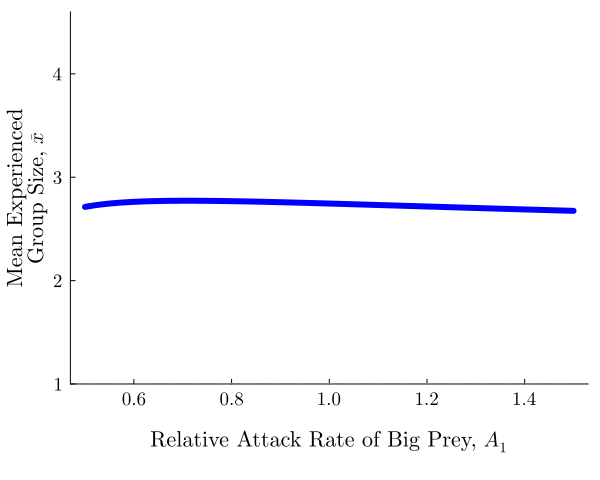

In [28]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :A1)
plot!(ylims=[1,4.6])
#savefig(plt_meanx, bif_fig_path * "meanx_varyA1_type2.pdf")

In [22]:
pltN1 = plot_nice_bif(br_list, :N1, :A1)
savefig(pltN1, bif_fig_path * "N1_varyA1_type2.pdf")


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/N1_varyA1_type2.pdf"

In [23]:
pltN2 = plot_nice_bif(br_list, :N2, :A1)
savefig(pltN2, bif_fig_path * "N2_varyA1_type2.pdf")



"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/N2_varyA1_type2.pdf"

In [24]:
pltNsum = plot_nice_bif(br_list, :Nsum, :A1)
plot!(ylims=[0,2])
savefig(pltNsum, bif_fig_path * "Nsum_varyA1_type2.pdf")



"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyA1_type2.pdf"

In [ ]:
pltp = plot_nice_bif(br_list, :P, :A1)
plot!(ylims=[0.0, 2.0])
savefig(pltp, bif_fig_path * "p_varyA1_type2.pdf")


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyA1_type2.pdf"

# Type II, Vary Tg

In [49]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
params[:Tg] = 0.1
params[:Tg_exp] = -3.0
p_nt = NamedTuple(scale_parameters(params))

(A1 = 0.6, η1 = 0.09999999999999999, H2b = 1.0, scale = 6.0, s1 = 2.0, H1a = 0.0, H2a = 0.0, x_max = 10, α2_of_1 = 0.95, η2 = 0.6, α2_fun_type = "constant", s2 = 2.0, α1_of_1 = 0.05, Tg = 0.1, Tg_exp = -3.0, d = 100.0, β1 = 6.0, H1b = 7.199999999999999, A2 = 0.5, β2 = 1.0)

In [50]:
br_list, extra_branches = diagram_2_recursion(p_nt; paramkey = :Tg,
        lens = (@optic _.Tg_exp), 
        p_min = -4.0, p_max = 0.0, 
        systemfunction =fullsystem_scaled_logTg 
        )

((coexist =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 286
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter Tg_exp starts at -4.0, ends at 0.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at Tg_exp ≈ -4.00000000,                                                                     step =   0
- #  2, endpoint at Tg_exp ≈ +0.00000000,                                                                     step = 285
, predator_extinct =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 286
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter Tg_exp starts at -4.0, ends at 0.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at Tg_exp ≈ -4.00000000,                                                                     step =   0
- #  2,       bp at Tg_exp ≈ -2.83450836 ∈ (-2.83451008, -2.83450836), |δp|=2e-06, [converged], δ = ( 1,  0), step =  84
- #  3, endpoint at Tg_exp ≈ +0.00000000,                                                                     step = 285
, 

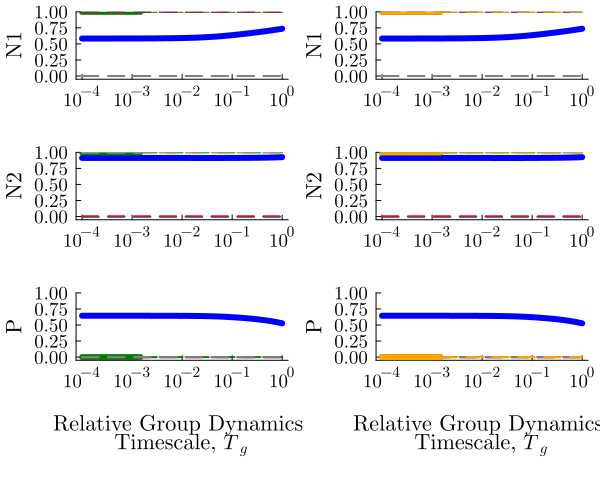

In [53]:
plot_comparison_branches_filtered(br_list, [br_list..., extra_branches...], :Tg; 
    ymax = 1.0, plot_fun = plot_nice_bif_Tg)

0.5841176500185038 0.5841168432757207 0.5841162212512183 0.5841165812377552 0.584117642604937 

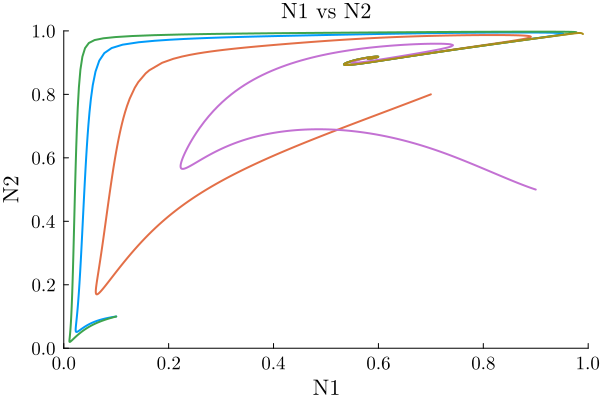

In [60]:
tf = 1000
tspan = (0.0, tf)

params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
params[:Tg] = 0.0001
p_nt = NamedTuple(scale_parameters(params))
starting_points = [ fill(0.1, x_max + 2),
                    [0.7, 0.8, fill(0.1,x_max)...],
                    [0.1, 0.1, fill(0.2,x_max-2)..., 0.01, 0.01],
                    [0.9, 0.5, 0.01, 1.0, fill(0.01, x_max - 2)...],
                    [0.99, 0.99, fill(0.001,x_max)...]]
plt = plot()
for u0 in starting_points
    prob = ODEProblem(fullsystem_scaled!, u0, tspan, p_nt)
    sol = solve(prob)

    # Extract N1 and N2 from the solution
    N1 = sol[1, :]  # First component of the solution
    N2 = sol[2, :]  # Second component of the solution
    print(N1[end])
    print(" ")
    plot!(N1, N2, xlabel="N1", ylabel="N2", title="N1 vs N2", legend=false, 
            xlims = (0,1), ylims = (0,1))
end
display(plt)

In [73]:
methods(plot_nice_bif_Tg)

# 1 method for generic function "plot_nice_bif_Tg" from CooperativeHuntingPkg.MyBifTools:
 [1] plot_nice_bif_Tg(br_list, y_axis_symbol; colorblind_palette)
     @ ~/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:186

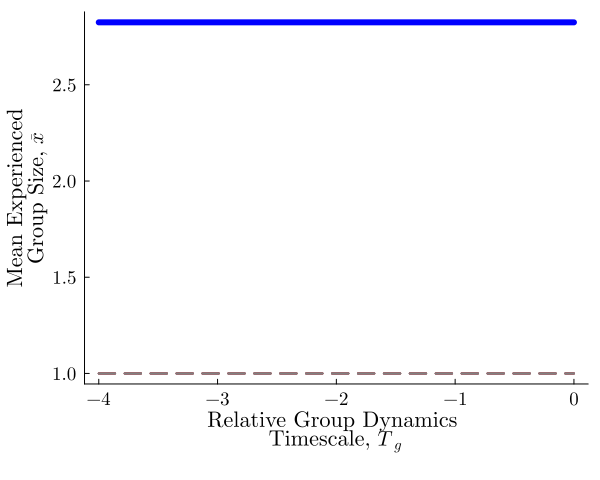

In [21]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :Tg)
#plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

In [8]:
methods(plot_nice_bif_Tg)

# 1 method for generic function "plot_nice_bif_Tg" from CooperativeHuntingPkg.MyBifTools:
 [1] plot_nice_bif_Tg(br_list, y_axis_symbol; colorblind_palette)
     @ ~/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:304

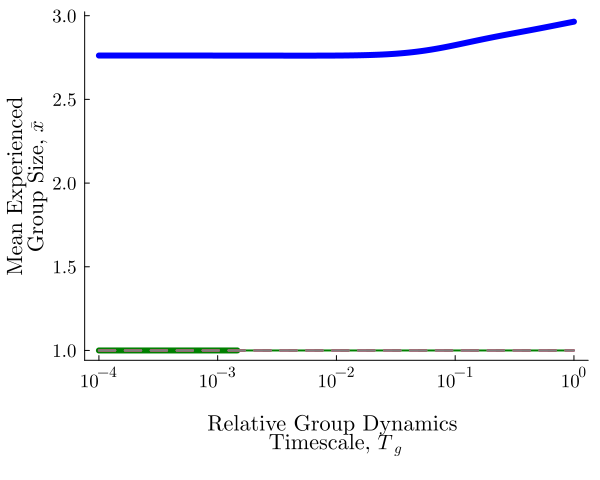

In [9]:
plt_meanx = plot_nice_bif_Tg(br_list, :mean_x)

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborof

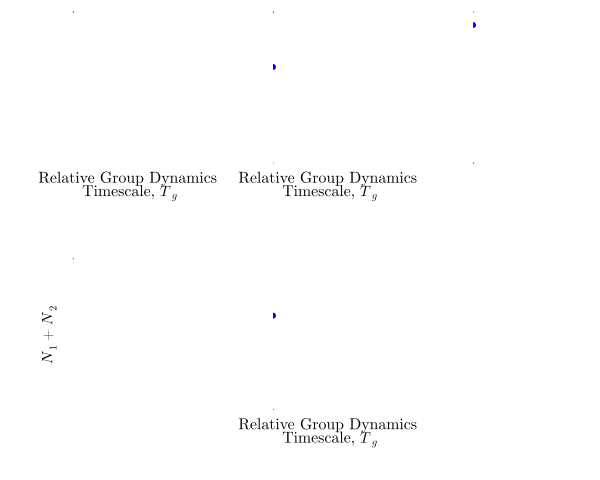

In [ ]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :Tg_exp)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

pltN1 = plot_nice_bif(br_list, :N1, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


pltN2 = plot_nice_bif(br_list, :N2, :Tg)
plot!(xscale = :log10)

pltNsum = plot_nice_bif(br_list, :Nsum, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


pltP = plot_nice_bif(br_list, :P, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


#plot_nice_bif(br_list, :g3, :η2)
pltfull = plot(plt_meanx, pltN1, pltN2, pltNsum, pltP, layout = (2,3),
tickfontsize=8, guidefontsize = 10)

In [5]:
savefig(plt_meanx, bif_fig_path*"meanx_varyTg_type2.pdf")
savefig(pltN1, bif_fig_path*"N1_varyTg_type2.pdf")
savefig(pltN2, bif_fig_path*"N2_varyTg_type2.pdf")
savefig(pltNsum, bif_fig_path*"Nsum_varyTg_type2.pdf")
savefig(pltP, bif_fig_path*"p_varyTg_type2.pdf")

UndefVarError: UndefVarError: `savefig` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Breaking input down into segments and plotting stability:

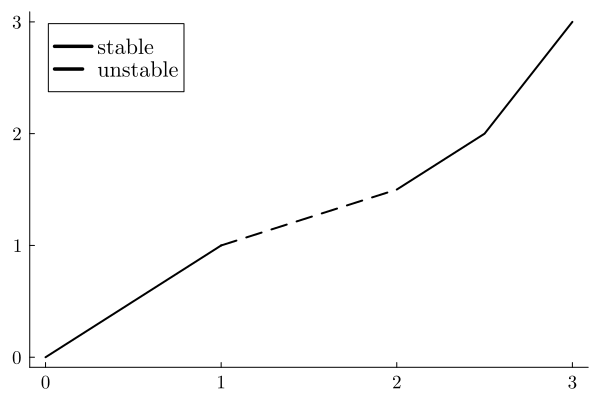

In [ ]:
using Plots


plot()
# Example usage
x_vec = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y_vec = [0.0, 0.5, 1.0, 1.25, 1.5, 2.0, 3.0]
stability_vec = [true, true, false, false, true, true, false]  # Stability of each point

plt = plot_segments(x_vec, y_vec, stability_vec)
display(plt)

In [16]:
1.5*.5

0.75